In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = 'D:\机器学习——Andrew_rag\code\ex2-logistic regression\ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam1','Exam2','Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


将数据分类，0为未录取，1为已录取，分别用不同的颜色以及标记来可视化

DataFrame.isin(values)功能：来查看参数values是否在Series/Data Frame里边，是的话就返回按DataFrame分布布尔值True，否则False；本次利用是先查询再将其放进参数中

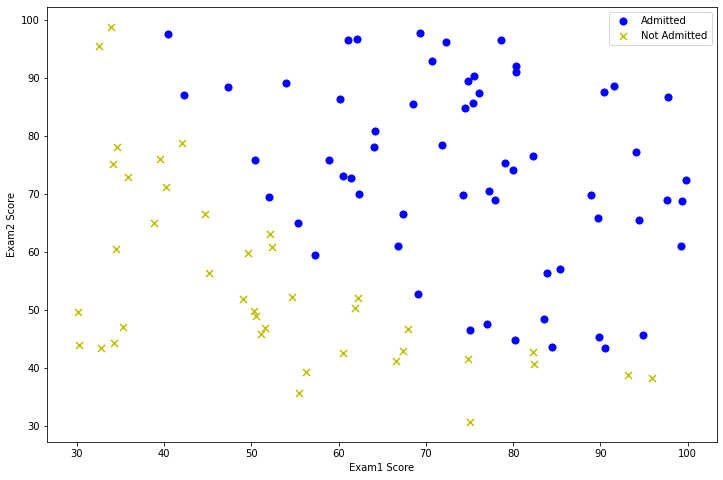

In [5]:
positve = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig , ax = plt.subplots(figsize=[12,8])
ax.scatter(positve['Exam1'],positve['Exam2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam1'],negative['Exam2'],s=50,c='y',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

# Sigmoid 函数

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 代价函数 
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [7]:
def cost(theta,x,y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(x * theta.T)))
    second = np.multiply(1-y,np.log(1-sigmoid(x * theta.T)))
    return np.sum(first - second) / (len(x))

参数设置

In [8]:
data.insert(0,'Ones',1)

cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.zeros(3)

cost(theta,x,y)

0.6931471805599453

# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [9]:
def gradient(theta,x,y):
    x = np.matrix(x)
    y = np.matrix(y)
    theta = np.matrix(theta)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    erros = sigmoid(x*theta.T) - y

    for i in range(parameters):
        term = np.multiply(erros,x[:,i])
        grad[i] = np.sum(term) / (len(x))
    
    return grad

注意以上仅仅只计算梯度步长

In [10]:
gradient(theta,x,y)

array([ -0.1       , -12.00921659, -11.26284221])

现在可以用SciPy's truncated newton（TNC）实现寻找最优参数。

In [11]:
import scipy.optimize as opt
# result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(x,y))

# result
theta, cost, *unused =opt.fmin_bfgs(f=cost,x0=theta,fprime=gradient,args=(x,y),maxiter=400,full_output=True,disp=False)

print('Cost at theta found by fmin:{:0.4f}'.format(cost))
print('Expected cost(approx):0.203')
print('theta:\n{}'.format(theta))
# print('Expected theta(approx):')

Cost at theta found by fmin:0.2035
Expected cost(approx):0.203
theta:
[-25.16133284   0.2062317    0.2014716 ]


C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


In [12]:
#cost(result[0],x,y)

计算数据集的预测能力

In [13]:
def predict(theta,x):
    m = x.shape[0]
    prob = np.zeros(m)
    prob = sigmoid(x*theta.T)
    prob[prob>=0.5] = 1
    prob[prob<0.5] = 0
    return prob

In [14]:
# theta_min = np.matrix(result[0])
# prediction = predict(theta_min,x)
prob = sigmoid(np.array([1,45,85]).dot(theta))
print('Predict an admission probability of {:0.4f}'.format(prob))
pre = predict(np.matrix(theta),x)
print('Train accuracy:{}'.format(np.mean(y==pre) * 100))
# theta_min = np.matrix(theta[0])
# predictions = predict(theta_min, x)
# correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
# accuracy = (sum(map(int, correct)) % len(correct))
# print ('accuracy = {0}%'.format(accuracy))

Predict an admission probability of 0.7763
Train accuracy:89.0


# 正则化逻辑回归

In [15]:
path = 'D:\机器学习——Andrew_rag\code\ex2-logistic regression\ex2data2.txt'
data2 = pd.read_csv(path,header=None,names=['Test1','Test2','Accepted'])
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


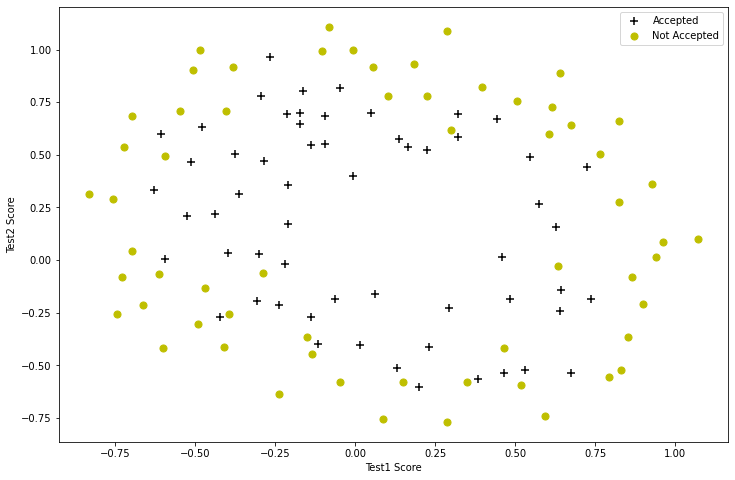

In [16]:
positve2 = data2[data2['Accepted'].isin([1])]
negative2 = data2[data2['Accepted'].isin([0])]

fig , ax = plt.subplots(figsize=[12,8])
ax.scatter(positve2['Test1'],positve2['Test2'],s=50,c='k',marker='+',label='Accepted')
ax.scatter(negative2['Test1'],negative2['Test2'],s=50,c='y',marker='o',label='Not Accepted')
ax.legend()
ax.set_xlabel('Test1 Score')
ax.set_ylabel('Test2 Score')
plt.show()

一个方法是用像逻辑回归这样的线性技术来构造从原始特征的多项式中得到的特征。让我们通过创建一组多项式特征入手吧。因为数据可视化可以看到这不是简单的线性回归，所以需要制造非线性回归
Feature mapping(特征映射)

In [17]:
degree = 6
x1 = data2['Test1']
x2 = data2['Test2']

data2.insert(3,'Ones',1)

for i in range(1,degree):
    for j in range(0,i):
        data2['F' + str(i) + str(j)] = np.power(x1,i-j) * np.power(x2,j)

data2.drop('Test1', axis=1, inplace=True)#删除掉"Test1和2"的数值列，只保留高维特征
data2.drop('Test2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43,F50,F51,F52,F53,F54
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551,3.541519e-07,0.000005,0.000066,0.000900,0.012278
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128


# 正则化代价函数
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [36]:
def costreg(theta,x,y,lamda):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)

    first = np.multiply(-y, np.log(sigmoid(x * theta.T)))
    second = np.multiply(1-y, np.log(1 - sigmoid(x * theta.T)))
    reg = (lamda / 2 * len(x)) * np.sum(np.power(theta[:1:theta.shape[1]],2))#添加的正则项

    return (np.sum(first - second) / (len(x))) + reg

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$


In [37]:
def gradientreg(theta,x,y,learningrate):#为什么不用alpha了？只计算一个梯度？？
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)

    parameter = int(theta.ravel().shape[1])##这里是创建j，j值只有0和1，所以parameters为2,ravel是矩阵向量化的操作
    gradient = np.zeros(parameter)#

    error = sigmoid(x * theta.T) - y

    for i in range(parameter):
        term = np.multiply(error, x[:,i])

        if i == 0:
            gradient[i] = np.sum(term) / len(x)
        else:
            gradient[i] = (np.sum(term) / len(x)) + ((learningrate / len(x)) * theta[:,i])
    
    return gradient

In [38]:
cols = data2.shape[1]
x2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

x2 = np.array(x2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(16)

In [39]:
learningrate = 1

costreg(theta2,x2,y2,learningrate)

0.6931471805599454

In [40]:
gradientreg(theta2,x2,y2,learningrate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594, 0.01997075, 0.00432983, 0.00338644, 0.00583822,
       0.00447629])

In [43]:
import scipy.optimize as opt
result2 = opt.fmin_tnc(func=costreg, x0=theta2, fprime=gradientreg, args=(x2, y2, learningrate))

result2

(array([ 1.24107299e-04,  7.65666519e-05, -3.72433882e-04, -1.32006615e-04,
         3.75884021e-05, -4.90673917e-05, -9.83201299e-05, -2.76679279e-04,
         5.10427272e-06, -1.91020227e-04, -1.42723162e-05, -2.61918680e-05,
        -2.21899130e-05, -2.59233514e-05, -8.93339205e-05, -5.72763064e-05]),
 96,
 1)

In [44]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, x2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


# sklearn 库

In [47]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(x2, y2.ravel())

LogisticRegression()

In [48]:
model.score(x2,y2)

0.6694915254237288